In [2]:
# Importing the libraries

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
# Part 1 - Data Preprocessing

# Importing the dataset

dataset = pd.read_csv('employee_attrition_test.csv')
#X = dataset.iloc[:, 3:-1].values
#y = dataset.iloc[:, -1].values
#print(X)
#print(y)
print(dataset.shape)
print(dataset.info())
print("/////////////////////////////////////////////////////////////////")
dataset.Department
print("///////////////////////////////////////////////////////")
dataset.head()
print("////////////////////////////")
q1=dataset.quantile(0.25)
q2=dataset.quantile(0.75)
IQR=q2-q1
print(IQR)
print("//////////////////////")
#to show if that is big differense between max and q3
print((dataset<q1-1.5*IQR)|(dataset>q2+1.5*IQR))

(441, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       386 non-null    float64
 1   BusinessTravel            436 non-null    object 
 2   DailyRate                 427 non-null    float64
 3   Department                441 non-null    object 
 4   DistanceFromHome          387 non-null    float64
 5   Education                 441 non-null    int64  
 6   EducationField            441 non-null    object 
 7   EmployeeCount             441 non-null    int64  
 8   EmployeeNumber            441 non-null    int64  
 9   EnvironmentSatisfaction   441 non-null    int64  
 10  Gender                    441 non-null    object 
 11  HourlyRate                441 non-null    int64  
 12  JobInvolvement            441 non-null    int64  
 13  JobLevel                  441 non-null    int64  
 14  

<ipython-input-2-9c5f4f5a7893>:29: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print((dataset<q1-1.5*IQR)|(dataset>q2+1.5*IQR))
<ipython-input-2-9c5f4f5a7893>:29: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print((dataset<q1-1.5*IQR)|(dataset>q2+1.5*IQR))


In [3]:
dataset.head(272)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,1,1469,4,...,4,80,0,6,4,3,5,4,1,3
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,1,250,4,...,3,80,2,5,3,3,4,2,1,3
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,1,1714,4,...,3,80,1,1,2,3,1,0,0,0
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,1,86,2,...,3,80,1,25,2,3,1,0,0,0
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,1,304,4,...,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,30.0,Non-Travel,1398.0,Sales,22.0,4,Other,1,567,3,...,3,80,0,10,3,3,9,8,7,8
268,NaN,Travel_Frequently,138.0,Research & Development,2.0,3,Medical,1,269,2,...,4,80,0,10,5,3,6,2,1,2
269,47.0,Non-Travel,543.0,Sales,2.0,4,Marketing,1,1731,3,...,4,80,1,4,3,1,1,0,0,0
270,NaN,Travel_Rarely,1214.0,Research & Development,1.0,3,Medical,1,105,2,...,1,80,0,6,3,3,6,4,0,4


In [4]:
 
dataset.head(272
            )[['Gender','HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','Over18','OverTime','PercentSalaryHike','PerformanceRating']]

,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating
0,Male,84,3,2,Sales Executive,1,Single,8463,23490,0,Y,No,18,3
1,Female,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,Y,No,11,3
2,Male,58,1,1,Human Resources,3,Married,1555,11585,1,Y,No,11,3
3,Male,59,3,3,Research Scientist,1,Divorced,9724,18787,2,Y,No,17,3
4,Male,62,3,2,Laboratory Technician,2,Single,5914,9945,8,Y,No,16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,Female,69,3,3,Sales Executive,1,Married,8412,2890,0,Y,No,11,3
268,Female,37,3,2,Laboratory Technician,2,Single,4425,15986,5,Y,No,11,3
269,Male,87,3,2,Sales Executive,2,Married,4978,3536,7,Y,No,11,3
270,Male,30,2,1,Research Scientist,3,Single,2859,26278,1,Y,No,18,3


In [5]:
#dataset=dataset.drop('hourInSecond')
#pd.drop('hourInSecond'
#dataset.drop('hourInSecond' , inplace=True, axis=1)
#dataset['hourInSecond']

In [6]:
q1=dataset.quantile(0.25)
q2=dataset.quantile(0.75)
IQR=q2-q1
print(IQR)
print((dataset<q1-1.5*IQR)|(dataset>q2+1.5*IQR))
print(dataset.skew())

Age                            12.0
DailyRate                     676.5
DistanceFromHome               13.0
Education                       2.0
EmployeeCount                   0.0
EmployeeNumber               1072.0
EnvironmentSatisfaction         2.0
HourlyRate                     34.0
JobInvolvement                  1.0
JobLevel                        2.0
JobSatisfaction                 2.0
MonthlyIncome                4556.0
MonthlyRate                 12192.0
NumCompaniesWorked              3.0
PercentSalaryHike               6.0
PerformanceRating               0.0
RelationshipSatisfaction        2.0
StandardHours                   0.0
StockOptionLevel                1.0
TotalWorkingYears               8.0
TrainingTimesLastYear           1.0
WorkLifeBalance                 1.0
YearsAtCompany                  6.0
YearsInCurrentRole              5.0
YearsSinceLastPromotion         3.0
YearsWithCurrManager            5.0
dtype: float64
       Age  BusinessTravel  DailyRate  Department

<ipython-input-6-b2c587f04f8e>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print((dataset<q1-1.5*IQR)|(dataset>q2+1.5*IQR))
<ipython-input-6-b2c587f04f8e>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print((dataset<q1-1.5*IQR)|(dataset>q2+1.5*IQR))


0.0
4.0
Age                         0.305037
DailyRate                   0.006461
DistanceFromHome            0.825486
Education                  -0.304552
EmployeeCount               0.000000
EmployeeNumber              0.004603
EnvironmentSatisfaction    -0.456853
HourlyRate                  0.094822
JobInvolvement             -0.494132
JobLevel                    1.045153
JobSatisfaction            -0.423921
MonthlyIncome               1.444882
MonthlyRate                 0.009638
NumCompaniesWorked          0.918808
PercentSalaryHike           0.871895
PerformanceRating           2.075033
RelationshipSatisfaction   -0.391560
StandardHours               0.000000
StockOptionLevel            0.963931
TotalWorkingYears           1.223588
TrainingTimesLastYear       0.542170
WorkLifeBalance            -0.583084
YearsAtCompany              1.966024
YearsInCurrentRole          0.805717
YearsSinceLastPromotion     2.011426
YearsWithCurrManager        0.730740
dtype: float64
1.1966726545651

{'whiskers': [<matplotlib.lines.Line2D at 0x22b48a88880>,
 'caps': [<matplotlib.lines.Line2D at 0x22b48a88f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x22b48a88520>],
 'medians': [<matplotlib.lines.Line2D at 0x22b48a9d640>],
 'fliers': [<matplotlib.lines.Line2D at 0x22b48a9d9a0>],
 'means': []}

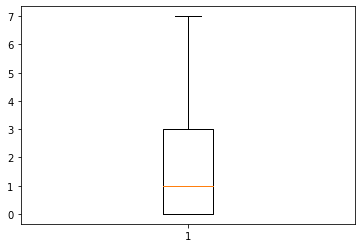

In [7]:
print(dataset['YearsSinceLastPromotion'].quantile(0.20))
print(dataset['YearsSinceLastPromotion'].quantile(0.80))
print(dataset.skew())
Q1=dataset['YearsSinceLastPromotion'].quantile(0.25)
Q3=dataset['YearsSinceLastPromotion'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

dataset['YearsSinceLastPromotion'] = np.where(dataset['YearsSinceLastPromotion'] <Min, 0.0,dataset['YearsSinceLastPromotion'])
dataset['YearsSinceLastPromotion'] = np.where(dataset['YearsSinceLastPromotion'] >Max, 4.0,dataset['YearsSinceLastPromotion'])
print(dataset['YearsSinceLastPromotion'].skew())
import matplotlib.pyplot as plt
plt.boxplot(dataset['YearsSinceLastPromotion'])

In [8]:
# Encoding categorical data
# Label Encoding the "Marital" column
dataset.info() 
from sklearn.preprocessing import LabelEncoder
 
l1= LabelEncoder()
dataset['Department']=l1.fit_transform(dataset['Department'])
dataset['EducationField']=l1.fit_transform(dataset['EducationField'])
dataset['Gender']=l1.fit_transform(dataset['Gender'])
dataset['JobRole']=l1.fit_transform(dataset['JobRole'])
#dataset['Over18']=l1.fit_transform(dataset['Over18'])
dataset['OverTime']=l1.fit_transform(dataset['OverTime'])
dataset['JobRole'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       386 non-null    float64
 1   BusinessTravel            436 non-null    object 
 2   DailyRate                 427 non-null    float64
 3   Department                441 non-null    object 
 4   DistanceFromHome          387 non-null    float64
 5   Education                 441 non-null    int64  
 6   EducationField            441 non-null    object 
 7   EmployeeCount             441 non-null    int64  
 8   EmployeeNumber            441 non-null    int64  
 9   EnvironmentSatisfaction   441 non-null    int64  
 10  Gender                    441 non-null    object 
 11  HourlyRate                441 non-null    int64  
 12  JobInvolvement            441 non-null    int64  
 13  JobLevel                  441 non-null    int64  
 14  JobRole   

array([7, 4, 1, 6, 2, 8, 0, 3, 5])

In [9]:
 #replace strings to numbers
dataset['MaritalStatus']=dataset['MaritalStatus'].replace('Single',0)
dataset['MaritalStatus']=dataset['MaritalStatus'].replace('Married',1)
dataset['MaritalStatus']=dataset['MaritalStatus'].replace('Divorced',2)
dataset['Over18']=dataset['Over18'].replace('Y',1)
#dataset['OverTime']=dataset['OverTime'].replace('Yes',1)
#dataset['OverTime']=dataset['OverTime'].replace('No',0)
dataset['BusinessTravel']=dataset['BusinessTravel'].replace('Non-Travel',0 )
dataset['BusinessTravel']=dataset['BusinessTravel'].replace('Travel_Rarely',1 )
dataset['BusinessTravel']=dataset['BusinessTravel'].replace('Travel_Frequently',2 )

In [10]:
dataset['OverTime'].unique()

array([0, 1])

In [11]:
#handel null value
dataset['Age'].fillna(value=dataset['Age'].mean(),inplace=True)
dataset['BusinessTravel'].fillna(value=-1,inplace=True)
dataset['DistanceFromHome'].fillna(value=dataset['DistanceFromHome'].mean(),inplace=True)
dataset['MaritalStatus'].fillna(value=-1,inplace=True)
dataset['DailyRate'].fillna(value= dataset['DailyRate'].mean(),inplace=True)
#search if there are any null or not
dataset.isna().any()

Age                         False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalanc

In [13]:
dataset.head(435)[['Gender','HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','Over18','OverTime','PercentSalaryHike','PerformanceRating']]

,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating
0,1,84,3,2,7,1,0.0,8463,23490,0,1,0,18,3
1,0,57,4,2,4,1,2.0,4450,26250,1,1,0,11,3
2,1,58,1,1,1,3,1.0,1555,11585,1,1,0,11,3
3,1,59,3,3,6,1,2.0,9724,18787,2,1,0,17,3
4,1,62,3,2,2,2,0.0,5914,9945,8,1,0,16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0,76,3,2,0,3,1.0,9824,22174,3,1,0,19,3
431,0,95,3,2,4,1,2.0,5485,22670,9,1,1,11,3
432,1,84,4,1,2,3,0.0,3500,25470,0,1,0,14,3
433,0,88,2,1,8,4,0.0,2342,21437,0,1,0,19,3


In [24]:
from sklearn.model_selection import train_test_split
#X = dataset.iloc[:,:33].values
#y = dataset.iloc[:,3].values 

features = dataset.drop(["OverTime"], axis=1).values
target = dataset["OverTime"].values
#features =dataset.iloc[:,:-1].values
#target = dataset.iloc[:,21].values

X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.25,random_state = 0)
print(X_test)
y_test 
 

[[3.800e+01 2.000e+00 4.260e+02 ... 7.000e+00 1.000e+00 0.000e+00]
 [4.900e+01 2.000e+00 1.023e+03 ... 6.000e+00 0.000e+00 8.000e+00]
 [4.900e+01 2.000e+00 1.064e+03 ... 4.000e+00 4.000e+00 3.000e+00]
 ...
 [3.200e+01 1.000e+00 6.010e+02 ... 3.000e+00 0.000e+00 3.000e+00]
 [3.800e+01 1.000e+00 1.117e+03 ... 3.000e+00 0.000e+00 2.000e+00]
 [3.300e+01 2.000e+00 4.300e+02 ... 3.000e+00 0.000e+00 3.000e+00]]


array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0])

In [41]:
X_train.shape
#X_test.shape

(330, 33)

In [26]:
 y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0])

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[-0.85668427  1.69432735 -1.26527148 ... -0.05435209 -0.32986169
  -0.08679019]
 [ 0.85003471 -1.84445762  1.12541501 ...  3.02843072  1.20329829
  -0.08679019]
 [-0.97859276 -1.84445762 -0.40760307 ... -0.61485806  0.18119164
  -0.63757408]
 ...
 [-1.10050126 -0.07506514  1.5131633  ...  1.34691282  1.20329829
   1.0147776 ]
 [-0.61286727 -0.07506514 -1.75059881 ... -0.61485806 -0.84091502
  -0.63757408]
 [-0.00332478 -0.07506514  1.77251812 ... -0.61485806  0.18119164
  -0.63757408]]


In [28]:
from sklearn.svm import SVC

c =SVC(C= 0.01, kernel='linear', gamma= 0.1)
c.fit(X_train, y_train )
#svc_model.fit(X_train, y_train)

SVC(C=0.01, gamma=0.1, kernel='linear')

In [30]:
print(c.predict(sc.transform([[49.0,2.0,1064.0,1,2.000000,1,1,1,1941,2,1,42,3,5,5,4,1.0,19161,13738,3,1,15,3,4,80,0,28,3,3,5,4,4.0,3]])))
print(y_test )

 

[0]
[1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0]


In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC  
 
prediction = c.predict(X_test )
# check the accuracy on the training set
print( c.score(X_train, y_train))
print( c.score(X_test, y_test ))
cm = confusion_matrix(y_test,prediction)
print(cm)
accuracy_score(y_test,prediction)

0.7272727272727273
0.7477477477477478
[[83  0]
 [28  0]]


0.7477477477477478

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = c.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
#plotconfusion( y_pred,y_test)

[[83  0]
 [28  0]]


0.7477477477477478

model = sequential
model.compile(optimizer'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:

from tensorflow import keras
from keras import regularizers
model = keras.Sequential([keras.layers.Flatten(),
        keras.layers.Dense(100,activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
        keras.layers.Dense(10,activation='sigmoid')                  
                         
                         ])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.optimizer.lr=0.001
mo=model.fit(X_train,y_train,batch_size=32,epochs=20)

Epoch 1/20
11/11 [==============================] - 0s 4ms/step - loss: 2.3167 - accuracy: 0.0758
Epoch 2/20
11/11 [==============================] - 0s 5ms/step - loss: 2.0131 - accuracy: 0.3303
Epoch 3/20
11/11 [==============================] - 0s 5ms/step - loss: 1.7710 - accuracy: 0.5848
Epoch 4/20
11/11 [==============================] - 0s 7ms/step - loss: 1.5594 - accuracy: 0.6697
Epoch 5/20
11/11 [==============================] - 0s 7ms/step - loss: 1.3719 - accuracy: 0.7152
Epoch 6/20
11/11 [==============================] - 0s 6ms/step - loss: 1.2031 - accuracy: 0.7303
Epoch 7/20
11/11 [==============================] - 0s 6ms/step - loss: 1.0580 - accuracy: 0.7455
Epoch 8/20
11/11 [==============================] - 0s 7ms/step - loss: 0.9363 - accuracy: 0.7455
Epoch 9/20
11/11 [==============================] - 0s 5ms/step - loss: 0.8365 - accuracy: 0.7485
Epoch 10/20
11/11 [==============================] - 0s 8ms/step - loss: 0.7558 - accuracy: 0.7545: 0s - loss: 0.7510 

In [36]:
from sklearn.metrics  import roc_auc_score
from sklearn.metrics  import roc_curve
log_roc=roc_auc_score(y_test, prediction)
fpr,tpr,thre =roc_curve(y_test,c.predict(X_test))


In [37]:
y_train

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

C:\Users\Ne\3D Objects\hhh\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ne\3D Objects\hhh\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ne\3D Objects\hhh\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\Ne\3D Objects\hhh\lib\site-packages\sklearn\svm\_base.py", line 558, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ne\3D Objects\hhh\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for th

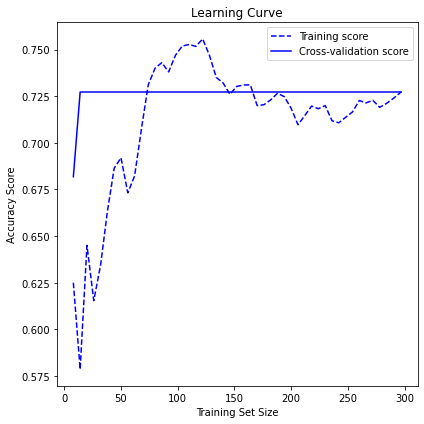

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(c,
                                                         X_train,  y_train, cv=10, scoring='accuracy',
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(6,6))
plt.plot(train_sizes, train_mean, '--', color='blue',  label="Training score")
plt.plot(train_sizes, test_mean, color='blue', label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

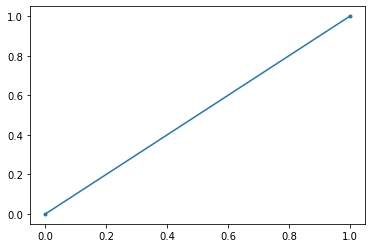

In [39]:
from sklearn.metrics  import roc_auc_score
from sklearn.metrics  import roc_curve ,auc
import matplotlib.pyplot as plt
y_pred=c.predict(X_test).ravel()
nn_fpr_keras,nn_tpr_keras,nn_thresholds_keras=roc_curve(y_test,prediction)
auc_keras=auc(nn_fpr_keras,nn_tpr_keras)
plt.plot(nn_fpr_keras,nn_tpr_keras, marker='.',label='  SVM (auc=%0.3f)'%auc_keras)